In [134]:
# setup

import spacy
from spacy import displacy

from collections import Counter

import pandas as pd
pd.options.display.max_rows = 600
pd.options.display.max_colwidth = 400

import en_core_web_sm
nlp = en_core_web_sm.load()

In [135]:
# get emma as long string

with open('emma.txt', 'r', encoding="utf8") as txt:
  emma = [line.strip() for line in txt.readlines()]
  
for line in emma:
  if 'VOL' in line:
    emma.remove(line)
  if 'CHAPTER' in line:
    emma.remove(line)
  if len(line) < 1:
    emma.remove(line)

text = ' '.join(emma)

print(text[:100])

Emma Woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to


In [137]:
import math
number_of_chunks = 80

chunk_size = math.ceil(len(text) / number_of_chunks)

text_chunks = []

for number in range(0, len(text), chunk_size):
    text_chunk = text[number:number+chunk_size]
    text_chunks.append(text_chunk)

In [138]:
chunked_documents = list(nlp.pipe(text_chunks))

In [184]:
people = []

for document in chunked_documents:
    for named_entity in document.ents:
        if named_entity.label_ == "PERSON":
            people.append(named_entity.text)

people_tally = Counter(people)

df = pd.DataFrame(people_tally.most_common(), columns=['character', 'count'])

df.sort_values(['count'], ascending=False)

df.iloc[:15]

,character,count
0,Emma,708
1,Weston,408
2,Elton,371
3,Knightley,279
4,Jane,180
5,Harriet,136
6,Woodhouse,131
7,Frank Churchill,129
8,Bates,125
9,Fairfax,107


In [185]:
def merge_characters(main, second):
    df.loc[df.character == main, 'count'] = df[df['character']==main]['count'].values[0] + df[df['character']==second]['count'].values[0]
    df.drop(df.loc[df['character']==second].index, inplace=True)

# merge a few common character names
merge_characters("Emma", "Miss Woodhouse")
merge_characters("Jane", "Jane Fairfax")
merge_characters("Jane", "Jane Fairfax's")
merge_characters("Harriet", "Miss Smith")
merge_characters("Harriet", "Harriet Smith")
merge_characters("Frank", "Frank Churchill")

df = df.sort_values(['count'], ascending=False).iloc[:15]
df.style.hide(axis='index')

character,count
Emma,717
Weston,408
Elton,371
Knightley,279
Jane,279
Harriet,193
Frank,182
Woodhouse,131
Bates,125
Fairfax,107


<AxesSubplot:title={'center':"Most referenced characters in Jane Austen's Emma"}, ylabel='character'>

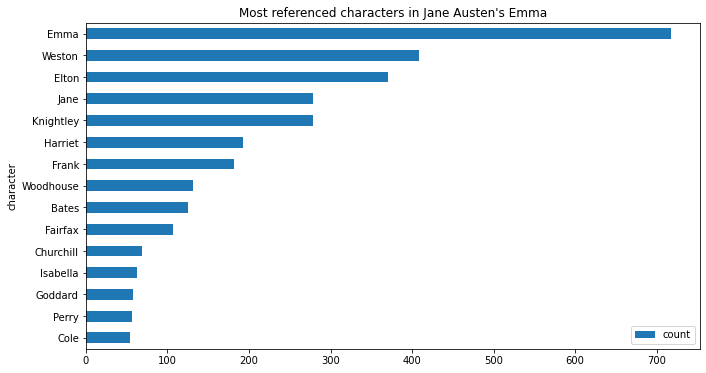

In [198]:
df = df.sort_values(['count'], ascending=True)
df.plot(kind='barh', x='character', title="Most referenced characters in Jane Austen's Emma", figsize=(11,6))